# Overview

In this notebook I would like to reproduced some SQL commands to Python using Pandas DataFrame. Let's pick some data. I am using the flights delays data set.

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

flights  = pd.read_csv('../input/flight-delays/flights.csv', low_memory=False)
print('Dataframe dimensions:', flights.shape)


Dataframe dimensions: (5819079, 31)


Let's quickly have a look on the structure of the flights data set.

In [2]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

# SELECT

Let's start with basic SELECT operation.


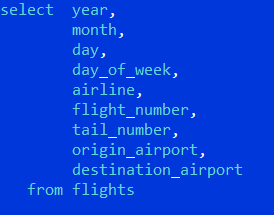

In [3]:
# Columns are selected by passing a list of column names to the DataFrame in Pandas

flights[["YEAR",  
         "MONTH",
         "DAY",  
         "DAY_OF_WEEK",            
         "AIRLINE",               
         "FLIGHT_NUMBER",          
         "TAIL_NUMBER",           
        "ORIGIN_AIRPORT",        
        "DESTINATION_AIRPORT"   
]]


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT
0,2015,1,1,4,AS,98,N407AS,ANC,SEA
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI
2,2015,1,1,4,US,840,N171US,SFO,CLT
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA
4,2015,1,1,4,AS,135,N527AS,SEA,ANC
...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU


Very often, you need to do a lot of manipulations with the values of the columns. For example, the sql below convert the numeric value to string and concatenate it to the format of DD/MM/YYYY

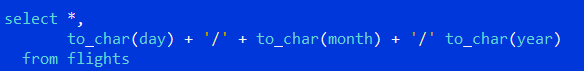

There is **astype** function which converts the data types in Pandas. Also, **assign** function could be usefull. 

In [4]:
fl = flights.assign(date = ( flights["DAY"].astype(str) + "/" +  
                             flights["MONTH"].astype(str)  + "/" +
                             flights["YEAR"].astype(str)
                           ))

# this is just an example of operation, but the data type should be the same. flights["YEAR"] is numeric  
#fl = flights.assign(date = flights["YEAR"] + 10) 

fl.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,date
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1/1/2015
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1/1/2015
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1/1/2015
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1/1/2015
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1/1/2015


# WHERE
Now, let's make our SQL a bit more complex by adding some filters using **where** conditions. In the example below I use logical opator **and**

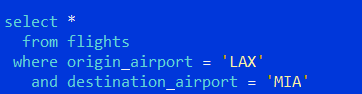

Pandas DataFrame can accept a series of True/False as a parameter and return all rows with True value. Additionally, you can filter the data with using AND (&) and OR (|) conditions. So, the above SQL will look like the below in Python

In [5]:
flights[ (flights ["ORIGIN_AIRPORT"] == "LAX") & (flights ["DESTINATION_AIRPORT"] == "MIA" ) ]

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
23,2015,1,1,4,AA,115,N3CTAA,LAX,MIA,105,103.0,-2.0,14.0,117.0,286.0,276.0,255.0,2342,832.0,7.0,851,839.0,-12.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1596,2015,1,1,4,AA,306,N859AA,LAX,MIA,800,759.0,-1.0,13.0,812.0,292.0,280.0,257.0,2342,1529.0,10.0,1552,1539.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2174,2015,1,1,4,AA,208,N355AA,LAX,MIA,840,842.0,2.0,19.0,901.0,293.0,285.0,264.0,2342,1625.0,2.0,1633,1627.0,-6.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5950,2015,1,1,4,AA,124,N7BEAA,LAX,MIA,1250,1305.0,15.0,17.0,1322.0,285.0,277.0,256.0,2342,2038.0,4.0,2035,2042.0,7.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5810121,2015,12,31,4,DL,1578,N3763D,LAX,MIA,1000,1004.0,4.0,17.0,1021.0,288.0,281.0,255.0,2342,1736.0,9.0,1748,1745.0,-3.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5810599,2015,12,31,4,AA,68,N393AA,LAX,MIA,1025,1101.0,36.0,27.0,1128.0,294.0,283.0,251.0,2342,1839.0,5.0,1819,1844.0,25.0,0,0,NaN,0.0,0.0,25.0,0.0,0.0
5812587,2015,12,31,4,AA,957,N7ATAA,LAX,MIA,1235,1236.0,1.0,21.0,1257.0,288.0,282.0,245.0,2342,2002.0,16.0,2023,2018.0,-5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5818782,2015,12,31,4,AA,2471,N3HVAA,LAX,MIA,2155,2149.0,-6.0,19.0,2208.0,288.0,279.0,256.0,2342,524.0,4.0,543,528.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


Let's have a look on **NULL** values. As you probably know, NULL is a special value for the column in the database, so in order to work with these values, RDBMS provides the special construction. The basic example is below.

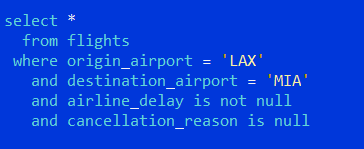

There are **isna()** and **notna(**) functions in Pandas which perform exactly the same operation

In [6]:
flights[ (flights ["ORIGIN_AIRPORT"] == "LAX") & 
         (flights ["DESTINATION_AIRPORT"] == "MIA" ) &
         (flights ["CANCELLATION_REASON"].isna()   ) &
         (flights ["AIRLINE_DELAY"].notna()   )
       ]

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
30018,2015,1,2,5,AA,2254,N5DJAA,LAX,MIA,2140,32.0,172.0,45.0,117.0,292.0,329.0,273.0,2342,850.0,11.0,532,901.0,209.0,0,0,NaN,37.0,0.0,172.0,0.0,0.0
30735,2015,1,3,6,AA,115,N3AMAA,LAX,MIA,105,117.0,12.0,17.0,134.0,286.0,297.0,272.0,2342,906.0,8.0,851,914.0,23.0,0,0,NaN,11.0,0.0,12.0,0.0,0.0
33920,2015,1,3,6,AA,208,N399AA,LAX,MIA,840,840.0,0.0,34.0,914.0,293.0,308.0,269.0,2342,1643.0,5.0,1633,1648.0,15.0,0,0,NaN,15.0,0.0,0.0,0.0,0.0
37833,2015,1,3,6,AA,124,N7BCAA,LAX,MIA,1250,1300.0,10.0,26.0,1326.0,285.0,290.0,255.0,2342,2041.0,9.0,2035,2050.0,15.0,0,0,NaN,5.0,0.0,10.0,0.0,0.0
46140,2015,1,4,7,AA,258,N3CJAA,LAX,MIA,20,30.0,10.0,22.0,52.0,285.0,314.0,272.0,2342,824.0,20.0,805,844.0,39.0,0,0,NaN,29.0,0.0,0.0,10.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5777316,2015,12,29,2,AA,252,N7LHAA,LAX,MIA,900,921.0,21.0,36.0,957.0,287.0,292.0,247.0,2342,1704.0,9.0,1647,1713.0,26.0,0,0,NaN,5.0,21.0,0.0,0.0,0.0
5794243,2015,12,30,3,DL,1578,N3755D,LAX,MIA,950,1027.0,37.0,15.0,1042.0,291.0,272.0,254.0,2342,1756.0,3.0,1741,1759.0,18.0,0,0,NaN,17.0,0.0,0.0,1.0,0.0
5805473,2015,12,30,3,DL,1168,N3772H,LAX,MIA,2210,2250.0,40.0,19.0,2309.0,290.0,267.0,244.0,2342,613.0,4.0,600,617.0,17.0,0,0,NaN,0.0,0.0,3.0,14.0,0.0
5809277,2015,12,31,4,AA,252,N7LSAA,LAX,MIA,900,949.0,49.0,18.0,1007.0,287.0,255.0,234.0,2342,1701.0,3.0,1647,1704.0,17.0,0,0,NaN,0.0,0.0,17.0,0.0,0.0


# GROUP BY
GROUP BY is a very common SQL operation which group the data based on different conditions. Let's have a look on the example below

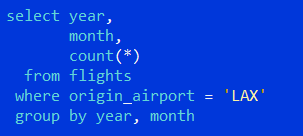

We use only one grouping function here (COUNT). There is a **groupby** function in Pandas which does the similar thing.

In [7]:
flights[flights["ORIGIN_AIRPORT"] == "LAX"].groupby(["YEAR","MONTH"]).size()

YEAR  MONTH
2015  1        17340
      2        15762
      3        18014
      4        17408
      5        17977
      6        18533
      7        19371
      8        19265
      9        17499
      11       16459
      12       17045
dtype: int64

We used **size** function in the above example. Alternatively, you can use .count() function which returns the number of NOT NULL records within each.

In [8]:
flights[flights["ORIGIN_AIRPORT"] == "LAX"].groupby(["YEAR","MONTH"]).count()

DAY  DAY_OF_WEEK  AIRLINE  FLIGHT_NUMBER  TAIL_NUMBER  \
YEAR MONTH                                                            
2015 1      17340        17340    17340          17340        17261   
     2      15762        15762    15762          15762        15708   
     3      18014        18014    18014          18014        17980   
     4      17408        17408    17408          17408        17388   
     5      17977        17977    17977          17977        17963   
     6      18533        18533    18533          18533        18489   
     7      19371        19371    19371          19371        19337   
     8      19265        19265    19265          19265        19233   
     9      17499        17499    17499          17499        17490   
     11     16459        16459    16459          16459        16438   
     12     17045        17045    17045          17045        17005   

            ORIGIN_AIRPORT  DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  \
YEAR MONTH                                                             
2015 1               17340                17340                17340   
     2               15762                15762                15762   
     3               18014                18014                18014   
     4               17408                17408                17408   
     5               17977                17977                17977   
     6               18533                18533                18533   
     7               19371                19371                19371   
     8               19265                19265                19265   
     9               17499                17499                17499   
     11              16459                16459                16459   
     12              17045                17045                17045   

            DEPARTURE_TIME  DEPARTURE_DELAY  TAXI_OUT  WHEELS_OFF  \
YEAR MONTH                                                          
2015 1               17097            17097     17096       17096   
     2               15441            15441     15439       15439   
     3               17842            17842     17836       17836   
     4               17307            17307     17305       17305   
     5               17884            17884     17881       17881   
     6               18262            18262     18255       18255   
     7               19097            19097     19091       19091   
     8               19034            19034     19026       19026   
     9               17399            17399     17395       17395   
     11              16365            16365     16363       16363   
     12              16857            16857     16852       16852   

            SCHEDULED_TIME  ELAPSED_TIME  AIR_TIME  DISTANCE  WHEELS_ON  \
YEAR MONTH                                                                
2015 1               17340         17048     17048     17340      17070   
     2               15762         15394     15394     15762      15414   
     3               18014         17789     17789     18014      17817   
     4               17408         17269     17269     17408      17297   
     5               17977         17816     17816     17977      17875   
     6               18533         18195     18195     18533      18246   
     7               19371         19016     19016     19371      19082   
     8               19265         18970     18970     19265      19012   
     9               17499         17373     17373     17499      17393   
     11              16459         16333     16333     16459      16358   
     12              17045         16800     16800     17045      16835   

            TAXI_IN  SCHEDULED_ARRIVAL  ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  \
YEAR MONTH                                                                      
2015 1        17070              17340         17070          17048     17340   
     2        15414              157

But, what if we need a couple of group by functions like in the example below.

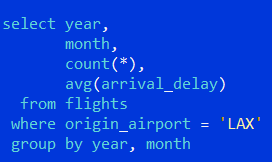

In this case we can use **agg** function. 

In [9]:
flights[flights["ORIGIN_AIRPORT"] == "LAX"].groupby(["YEAR","MONTH"]).agg({"ARRIVAL_DELAY": [np.size, np.mean]})


ARRIVAL_DELAY           
                    size       mean
YEAR MONTH                         
2015 1             17340   5.542058
     2             15762   6.092633
     3             18014   9.122660
     4             17408   2.943772
     5             17977   4.933487
     6             18533   9.765320
     7             19371  10.184056
     8             19265   6.268846
     9             17499   0.281874
     11            16459  -1.153003
     12            17045   7.934762

# JOIN

One of the best features of the SQL is opportunity to join tables/relations. Suppose we have two tables: A and B and we need to join them. Let's start with the basic **Inner Join**. 

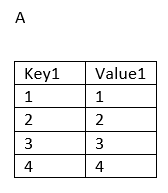

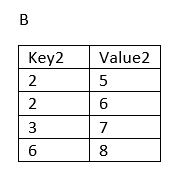

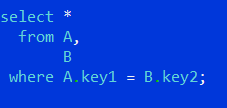

In [10]:
df1 = pd.DataFrame({"key1": [1, 2, 3, 4], "value1": [1,2,3,4]})

df2 = pd.DataFrame({"key2": [2, 2, 3, 6], "value2": [5,6,7,8]})

print(df1)
print("----------------------")
print(df2)

   key1  value1
0     1       1
1     2       2
2     3       3
3     4       4
----------------------
   key2  value2
0     2       5
1     2       6
2     3       7
3     6       8


There is a **merge** function in Pandas which can join **only two** DataFrames. So, if you need to join more than 2 tables you can probably use iterative approach merge from megre etc. - this is not very usefull to be honest.

In [11]:
pd.merge(df1, df2, left_on="key1", right_on="key2")

,key1,value1,key2,value2
0,2,2,2,5
1,2,2,2,6
2,3,3,3,7


Now, let's have a look on **Left Outer Join**

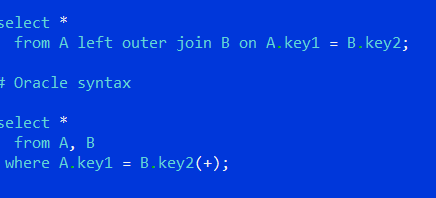

We can do it by using the same function **merge**.

In [12]:
pd.merge(df1, df2, left_on="key1", right_on="key2", how="left")

,key1,value1,key2,value2
0,1,1,NaN,NaN
1,2,2,2.0,5.0
2,2,2,2.0,6.0
3,3,3,3.0,7.0
4,4,4,NaN,NaN


The same is with **right outer join**

In [13]:
pd.merge(df1, df2, left_on="key1", right_on="key2", how="right")

,key1,value1,key2,value2
0,2.0,2.0,2,5
1,2.0,2.0,2,6
2,3.0,3.0,3,7
3,NaN,NaN,6,8


Also, it is very usefull that merge also supports **Full Outer Join**

In [14]:
pd.merge(df1, df2, left_on="key1", right_on="key2", how="outer")

,key1,value1,key2,value2
0,1.0,1.0,NaN,NaN
1,2.0,2.0,2.0,5.0
2,2.0,2.0,2.0,6.0
3,3.0,3.0,3.0,7.0
4,4.0,4.0,NaN,NaN
5,NaN,NaN,6.0,8.0


# WARNING

Please note that if both key columns contain rows where the key is a null value, those rows **will be matched against each other**. This is completely different from usual SQL join behaviour and can lead to unexpected results. However, I don't think that it's a bit issue to be honest.

In [15]:
df11 = pd.merge(df1, df2, left_on="key1", right_on="key2", how="left")
df22 = pd.merge(df1, df2, left_on="key1", right_on="key2", how="left")


pd.merge(df11, df22, left_on="key2", right_on="value2")

,key1_x,value1_x,key2_x,value2_x,key1_y,value1_y,key2_y,value2_y
0,1,1,NaN,NaN,1,1,NaN,NaN
1,1,1,NaN,NaN,4,4,NaN,NaN
2,4,4,NaN,NaN,1,1,NaN,NaN
3,4,4,NaN,NaN,4,4,NaN,NaN


You can even do a **self join** with using merge.

In [16]:
print(df11)

pd.merge(df11, df11, left_on="key2", right_on="value2")


   key1  value1  key2  value2
0     1       1   NaN     NaN
1     2       2   2.0     5.0
2     2       2   2.0     6.0
3     3       3   3.0     7.0
4     4       4   NaN     NaN


,key1_x,value1_x,key2_x,value2_x,key1_y,value1_y,key2_y,value2_y
0,1,1,NaN,NaN,1,1,NaN,NaN
1,1,1,NaN,NaN,4,4,NaN,NaN
2,4,4,NaN,NaN,1,1,NaN,NaN
3,4,4,NaN,NaN,4,4,NaN,NaN


# UNION

Set operations are also quite common in SQL. The **UNION ALL** example is below:

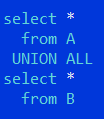

This operation can be done using **concat** function in Pandas. However, in this case the columns names should be the same. If they are different, the result would be different which is not very useful.

In [17]:
df1 = pd.DataFrame({"key": [1, 2, 3, 4], "value": [1,2,3,4]})

df2 = pd.DataFrame({"key": [2, 2, 3, 6], "value": [5,6,3,8]})

print(df1)
print("----------------------")
print(df2)

   key  value
0    1      1
1    2      2
2    3      3
3    4      4
----------------------
   key  value
0    2      5
1    2      6
2    3      3
3    6      8


In [18]:
pd.concat([df1, df2])

,key,value
0,1,1
1,2,2
2,3,3
3,4,4
0,2,5
1,2,6
2,3,3
3,6,8


**UNION** can be done with remove_duplicate function.

In [19]:
pd.concat([df1, df2]).drop_duplicates()

,key,value
0,1,1
1,2,2
2,3,3
3,4,4
0,2,5
1,2,6
3,6,8


Unfortunately, there are no specific functions in Pandas for **Minus** (**Except**) or **Intersect** set operations. There is a way to use them - please see below.


# pandaSQL

Recently, I have found this lovely [notebook](https://www.kaggle.com/code/dataraj/sql-on-pandas-dataframe-using-pandasql) by @dataraj with using pandasql library to query pandas DataFrame. Let's have a look on this feature in more details.

I am not going to focus on basic SQL operations, I would review the limits of this library.

Let's start with basic group by operation

In [20]:
import pandas as pd
import numpy as np

df1 = pd.DataFrame({"key": [1, 2, 3, 4], "value": [1,2,3,4]})

df2 = pd.DataFrame({"key": [2, 2, 3, 6], "value": [5,6,3,8]})

print(df1)
print("----------------------")
print(df2)

   key  value
0    1      1
1    2      2
2    3      3
3    4      4
----------------------
   key  value
0    2      5
1    2      6
2    3      3
3    6      8


In [21]:
## Importing pandasql 
import pandasql as psql

slq1_df2 =  psql.sqldf("select key, count(*) from df2 group by key")
slq1_df2

,key,count(*)
0,2,2
1,3,1
2,6,1


What about the With construction?

In [22]:
slq1_df2 =  psql.sqldf("with t as (select key, count(*) from df2 group by key) select * from t")
slq1_df2

,key,count(*)
0,2,2
1,3,1
2,6,1


Nice, what about the INTERSECT and Except?

In [23]:
tmp =  psql.sqldf("select * from df1 union select * from df2")
tmp

,key,value
0,1,1
1,2,2
2,2,5
3,2,6
4,3,3
5,4,4
6,6,8


In [24]:
tmp =  psql.sqldf("select * from df1 intersect select * from df2")
tmp

,key,value
0,3,3


In [25]:
tmp =  psql.sqldf("select * from df1 except select * from df2")
tmp

,key,value
0,1,1
1,2,2
2,4,4


Great! Now, let's have a look on build in functions.

In [26]:
df3 = pd.DataFrame({"key": [1, 2, 3, 4], "value": [1,2,3,4], "valString": ["test", "ttt", None, "fff"]})
print(df3)

tmp =  psql.sqldf("select *, \
                          char(key), \
                          ifnull(valString, 'null'), \
                          length(valString), \
                          instr(valString, 'tt'), \
                          substr(valString, 1, 2), \
                          substr(valString, 1, 2) + 'test string',\
                          'vvv'+'xxx'\
                     from df3")
tmp

   key  value valString
0    1      1      test
1    2      2       ttt
2    3      3      None
3    4      4       fff


,key,value,valString,char(key),"ifnull(valString, 'null')",length(valString),"instr(valString, 'tt')","substr(valString, 1, 2)","substr(valString, 1, 2) + 'test string'",'vvv'+'xxx'
0,1,1,test,,test,4.0,0.0,te,0.0,0
1,2,2,ttt,,ttt,3.0,1.0,tt,0.0,0
2,3,3,None,,null,NaN,NaN,None,NaN,0
3,4,4,fff,,fff,3.0,0.0,ff,0.0,0


Well, we see that some of the functions work well (ifnull, length, etc.). However, we need to be very careful with these functions, because CHAR returns weird string, the string concatenation doesn't work etc.

**But, The biggest problem with pandaSQL is PERFORMANCE!!!**. It requires a LOT of resources (CPU and RAM). In my case, I could not even perform basic operation on flights data set, which is quite small. This makes the practical use of this library useless I am afraid.

In conclusion, I can say that I'm impressed with Pandas and the basic SQL operations could be quite easily reproduced in Pandas. However, if you need quite complex analysis (multiple joins, SQL analytics functions, complex set operations), Pandas also can do it, but with much more effort than in SQL.